In [219]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


In [220]:
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')

# MY WORK AREA FOR DSC 106 FINAL

## Standardize Column Names Across Datasets and Drop Useless Columns

In [221]:
df_2015 = df_2015.rename(columns={"Family":"Social Support", "Economy (GDP per Capita)":"GDP", "Health (Life Expectancy)":"Life Expectancy", "Trust (Government Corruption)":"Government Corruption"})                 
df_2015 = df_2015.drop(columns=["Region","Standard Error", "Dystopia Residual"])
df_2015 = df_2015[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity', 'Social Support']]

df_2016 = df_2016.rename(columns={"Family": "Social Support", "Economy (GDP per Capita)":"GDP", "Health (Life Expectancy)":"Life Expectancy", "Trust (Government Corruption)":"Government Corruption"})                 
df_2016 = df_2016.drop(columns=["Region", "Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"])
df_2016 = df_2016[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity', 'Social Support']]

df_2017 = df_2017.rename(columns={"Family": "Social Support", "Happiness.Rank":"Happiness Rank","Happiness.Score":"Happiness Score", "Economy..GDP.per.Capita.":"GDP", "Health..Life.Expectancy.":"Life Expectancy", "Trust..Government.Corruption.":"Government Corruption"})                 
df_2017 = df_2017.drop(columns=["Whisker.high", "Whisker.low", "Dystopia.Residual"])
df_2017 = df_2017[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity', 'Social Support']]

df_2018 = df_2018.rename(columns={"Social support": "Social Support", "Overall rank":"Happiness Rank","Country or region":"Country", "Score":"Happiness Score", "GDP per capita":"GDP", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Government Corruption"})                 
df_2018 = df_2018[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity','Social Support']]

df_2019 = df_2019.rename(columns={"Social support": "Social Support", "Overall rank":"Happiness Rank","Country or region":"Country", "Score":"Happiness Score", "GDP per capita":"GDP", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Government Corruption"})                 
df_2019 = df_2019[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity','Social Support']]


In [233]:
df_2018[df_2018['GDP'] == 2.096]

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity,Social Support
19,20,6.774,United Arab Emirates,2.096,0.67,0.284,NaN,0.186,0.776


## How I get linear regression line points to create the first linear regression 

I print out the values and copy and paste it into HighCharts

In [235]:
# GDP as a feature
gdp_df = pd.concat([df_2015[['Happiness Score','GDP']],df_2016[['Happiness Score','GDP']], df_2017[['Happiness Score','GDP']], df_2018[['Happiness Score','GDP']], df_2019[['Happiness Score','GDP']]], ignore_index=True)
gdp_df = gdp_df.rename(columns = {'Happiness Score': 'HappinessScore'})

#GDP Linear Regression
lm = linregress(gdp_df.GDP, gdp_df.HappinessScore)
pred_HappinessScore = lambda x: lm.slope * x + lm.intercept
gdp_rmse = np.sqrt(np.mean((pred_HappinessScore(gdp_df.GDP) - gdp_df.HappinessScore)**2))
print(gdp_rmse)

#GDP Grabbing Values for Charting
gdp_df['pred'] = gdp_df.GDP.apply(lambda x: lm.slope * x + lm.intercept)

gdp_lr_pts = []
tmp = gdp_df.sort_values(by=['pred'], ascending=False).head(1)
gdp_lr_pts.append([tmp['GDP'].item(), tmp['pred'].item()])
tmp = gdp_df.sort_values(by=['pred'], ascending=True).head(1)
gdp_lr_pts.append([tmp['GDP'].item(), tmp['pred'].item()])
print(gdp_lr_pts)

gdp_scatter = []
def grab_pairs(x, y):
    return [x,y]

gdp_df['scatter'] = gdp_df.apply(lambda x: grab_pairs(x['GDP'], x['HappinessScore']), axis = 1)
gdp_df['scatter'].tolist()

0.839287167874346
[[2.096, 7.583013859718173], [0.0, 3.7585719597679295]]


[[1.3965100000000001, 7.587000000000001],
 [1.3023200000000001, 7.561],
 [1.32548, 7.527],
 [1.459, 7.522],
 [1.32629, 7.4270000000000005],
 [1.29025, 7.406000000000001],
 [1.32944, 7.377999999999999],
 [1.33171, 7.364],
 [1.2501799999999998, 7.2860000000000005],
 [1.33358, 7.284],
 [1.2285700000000002, 7.278],
 [0.95578, 7.226],
 [1.33723, 7.2],
 [1.02054, 7.187],
 [1.3945100000000001, 7.119],
 [0.98124, 6.983],
 [1.5639100000000001, 6.946000000000001],
 [1.33596, 6.94],
 [1.30782, 6.937],
 [1.42727, 6.901],
 [1.26637, 6.867000000000001],
 [1.36011, 6.853],
 [1.04424, 6.81],
 [1.52186, 6.797999999999999],
 [1.0635299999999999, 6.7860000000000005],
 [1.32792, 6.75],
 [1.10715, 6.67],
 [1.69042, 6.611000000000001],
 [1.27778, 6.575],
 [1.05351, 6.574],
 [1.17898, 6.505],
 [1.06166, 6.485],
 [0.91861, 6.477],
 [0.9669, 6.455],
 [1.39541, 6.4110000000000005],
 [1.23011, 6.329],
 [1.2074, 6.3020000000000005],
 [1.29098, 6.297999999999999],
 [1.5542200000000002, 6.295],
 [0.99534, 6.269],
 

In [236]:
#Life Expectancy as a Feature
life_df = pd.concat([df_2015[['Happiness Score','Life Expectancy']],df_2016[['Happiness Score','Life Expectancy']], df_2017[['Happiness Score','Life Expectancy']], df_2018[['Happiness Score','Life Expectancy']], df_2019[['Happiness Score','Life Expectancy']]], ignore_index=True)
life_df = life_df.rename(columns = {'Happiness Score': 'HappinessScore', 'Life Expectancy': 'LifeExpectancy'})

#Life Expectancy Linear Regression
lm = linregress(life_df.LifeExpectancy, life_df.HappinessScore)
pred_HappinessScore = lambda x: lm.slope * x + lm.intercept
life_rmse = np.sqrt(np.mean((pred_HappinessScore(life_df.LifeExpectancy) - life_df.HappinessScore)**2))
print(life_rmse)

#Life Expectancy Grabbing Values for Charting
life_df['pred'] = life_df.LifeExpectancy.apply(lambda x: lm.slope * x + lm.intercept)

life_lr_pts = []
tmp = life_df.sort_values(by=['pred'], ascending=False).head(1)
life_lr_pts.append([tmp['LifeExpectancy'].item(), tmp['pred'].item()])
tmp = life_df.sort_values(by=['pred'], ascending=True).head(1)
life_lr_pts.append([tmp['LifeExpectancy'].item(), tmp['pred'].item()])
print(life_lr_pts)

life_scatter = []
life_df['scatter'] = life_df.apply(lambda x: grab_pairs(x['LifeExpectancy'], x['HappinessScore']), axis = 1)
life_df['scatter'].tolist()

0.896321413141705
[[1.141, 6.889202558711242], [0.0, 3.7502070806176215]]


[[0.9414299999999999, 7.587000000000001],
 [0.94784, 7.561],
 [0.87464, 7.527],
 [0.88521, 7.522],
 [0.9056299999999999, 7.4270000000000005],
 [0.8891100000000001, 7.406000000000001],
 [0.89284, 7.377999999999999],
 [0.9108700000000001, 7.364],
 [0.9083700000000001, 7.2860000000000005],
 [0.93156, 7.284],
 [0.9138700000000001, 7.278],
 [0.8602700000000001, 7.226],
 [0.8904200000000001, 7.2],
 [0.8144399999999999, 7.187],
 [0.86179, 7.119],
 [0.69702, 6.983],
 [0.91894, 6.946000000000001],
 [0.89533, 6.94],
 [0.8966700000000001, 6.937],
 [0.80925, 6.901],
 [0.90943, 6.867000000000001],
 [0.76276, 6.853],
 [0.7205199999999999, 6.81],
 [1.02525, 6.797999999999999],
 [0.79661, 6.7860000000000005],
 [0.89186, 6.75],
 [0.85857, 6.67],
 [0.79733, 6.611000000000001],
 [0.9457899999999999, 6.575],
 [0.78723, 6.574],
 [0.84483, 6.505],
 [0.8116, 6.485],
 [0.69077, 6.477],
 [0.7385, 6.455],
 [0.72025, 6.4110000000000005],
 [0.95562, 6.329],
 [0.88721, 6.3020000000000005],
 [0.8753, 6.297999999999

In [237]:
#Social Support as a Feature
social_df = pd.concat([df_2015[['Happiness Score','Social Support']],df_2016[['Happiness Score','Social Support']], df_2017[['Happiness Score','Social Support']], df_2018[['Happiness Score','Social Support']], df_2019[['Happiness Score','Social Support']]], ignore_index=True)
social_df = social_df.rename(columns = {'Happiness Score': 'HappinessScore', 'Social Support': 'SocialSupport'})

#Social Support Linear Regression
lm = linregress(social_df.SocialSupport, social_df.HappinessScore)
pred_HappinessScore = lambda x: lm.slope * x + lm.intercept
social_rmse = np.sqrt(np.mean((pred_HappinessScore(social_df.SocialSupport) - social_df.HappinessScore)**2))
print(social_rmse)

#Social Support Grabbing Values for Charting
social_df['pred'] = social_df.SocialSupport.apply(lambda x: lm.slope * x + lm.intercept)

social_lr_pts = []
tmp = social_df.sort_values(by=['pred'], ascending=False).head(1)
social_lr_pts.append([tmp['SocialSupport'].item(), tmp['pred'].item()])
tmp = social_df.sort_values(by=['pred'], ascending=True).head(1)
social_lr_pts.append([tmp['SocialSupport'].item(), tmp['pred'].item()])
print(social_lr_pts)

social_scatter = []
social_df['scatter'] = social_df.apply(lambda x: grab_pairs(x['SocialSupport'], x['HappinessScore']), axis = 1)
social_df['scatter'].tolist()

0.9927740526036232
[[1.6440000000000001, 6.305650896789627], [0.0, 3.751915356018755]]


[[1.34951, 7.587000000000001],
 [1.4022299999999999, 7.561],
 [1.36058, 7.527],
 [1.33095, 7.522],
 [1.32261, 7.4270000000000005],
 [1.31826, 7.406000000000001],
 [1.28017, 7.377999999999999],
 [1.2890700000000002, 7.364],
 [1.3196700000000001, 7.2860000000000005],
 [1.30923, 7.284],
 [1.22393, 7.278],
 [1.2378799999999999, 7.226],
 [1.29704, 7.2],
 [0.91451, 7.187],
 [1.24711, 7.119],
 [1.2328700000000001, 6.983],
 [1.21963, 6.946000000000001],
 [1.36948, 6.94],
 [1.28566, 6.937],
 [1.12575, 6.901],
 [1.28548, 6.867000000000001],
 [1.08182, 6.853],
 [1.25596, 6.81],
 [1.02, 6.797999999999999],
 [1.1985, 6.7860000000000005],
 [1.2993700000000001, 6.75],
 [1.12447, 6.67],
 [1.0786, 6.611000000000001],
 [1.2603799999999998, 6.575],
 [1.24823, 6.574],
 [1.20643, 6.505],
 [1.2089, 6.485],
 [1.2401799999999998, 6.477],
 [1.26504, 6.455],
 [1.0839299999999998, 6.4110000000000005],
 [1.31379, 6.329],
 [1.30203, 6.3020000000000005],
 [1.07617, 6.297999999999999],
 [1.16594, 6.295],
 [0.972, 6.

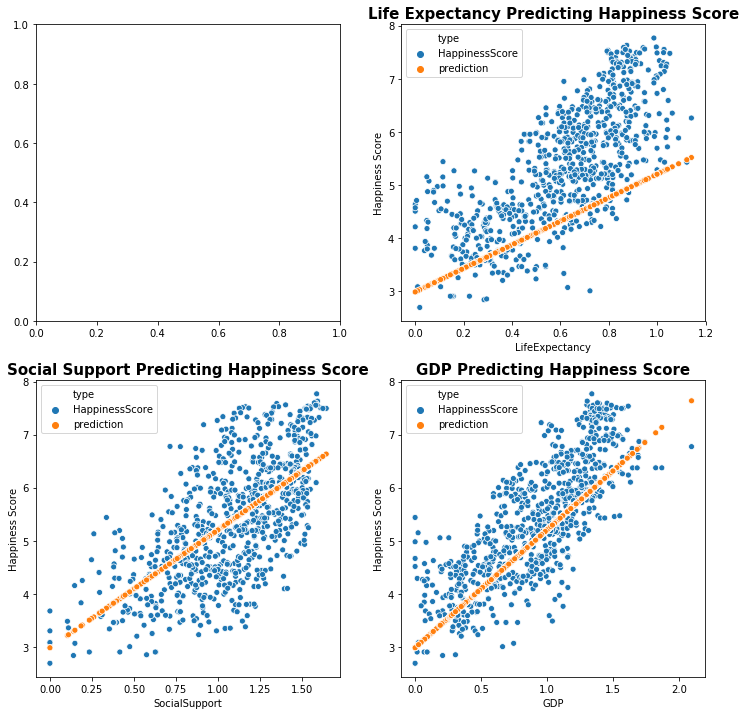

In [126]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

#GDP subplot
combo = pd.concat([gdp_df[['GDP', 'HappinessScore']], \
                   pred_HappinessScore(gdp_df.GDP).rename('prediction')],axis=1)
combo = combo.set_index('GDP').unstack().rename('Happiness Score').reset_index().rename(columns={'level_0':'type'})

sns.scatterplot(data=combo,x='GDP', y='Happiness Score',hue='type', ax=axes[1][1])
axes[1][1].set_title('GDP Predicting Happiness Score', fontweight='bold',fontsize = 15)

# life expectancy subplot
combo_lf = pd.concat([life_df[['LifeExpectancy', 'HappinessScore']], \
                   pred_HappinessScore(life_df.LifeExpectancy).rename('prediction')],axis=1)
combo_lf = combo_lf.set_index('LifeExpectancy').unstack().rename('Happiness Score').reset_index().rename(columns={'level_0':'type'})

sns.scatterplot(data=combo_lf,x='LifeExpectancy', y='Happiness Score',hue='type', ax=axes[0][1])
axes[0][1].set_title('Life Expectancy Predicting Happiness Score', fontweight='bold',fontsize = 15)


#social support subplot
combo_ss = pd.concat([social_df[['SocialSupport', 'HappinessScore']], \
                   pred_HappinessScore(social_df.SocialSupport).rename('prediction')],axis=1)
combo_ss = combo_ss.set_index('SocialSupport').unstack().rename('Happiness Score').reset_index().rename(columns={'level_0':'type'})

sns.scatterplot(data=combo_ss,x='SocialSupport', y='Happiness Score',hue='type', ax=axes[1][0])
axes[1][0].set_title('Social Support Predicting Happiness Score', fontweight='bold',fontsize = 15)

plt.show()

## How I get values to create my top 5 makeup chart

In [238]:
top_5 = df_2019.sort_values(by=['Happiness Score'], ascending = False).head(5)
top_5 = top_5[['Country','Social Support', 'GDP', 'Life Expectancy']]

print(top_5.Country.tolist())
print(top_5['Social Support'].tolist())
print(top_5['GDP'].tolist())
print(top_5['Life Expectancy'].tolist())

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands']
[0.313946587537092, 0.30215136381098734, 0.29776021080368903, 0.31886903593167093, 0.29878288182175106]
[0.26508407517309596, 0.2656550134460238, 0.28006775832862796, 0.2709601413705085, 0.2740478994895956]
[0.1950544015825915, 0.19131771033422973, 0.19348767174854134, 0.20145297467111722, 0.19611307420494703]


HOW I AM GETTING DATA FOR PIE CHARTS

In [127]:
top_5 = df_2019.sort_values(by=['Happiness Score'], ascending = False).head(6)

top_5['sum'] = top_5[['GDP','Life Expectancy', 'Freedom',\
                      'Government Corruption', 'Generosity','Social Support']].sum(axis=1)

top_5['GDP'] = top_5['GDP']/top_5['sum']
top_5['Life Expectancy'] = top_5['Life Expectancy']/top_5['sum']
top_5['Freedom'] = top_5['Freedom']/top_5['sum']
top_5['Government Corruption'] = top_5['Government Corruption']/top_5['sum']
top_5['Social Support'] = top_5['Social Support']/top_5['sum']


In [141]:
top_5

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity,Social Support,sum
0,1,7.769,Finland,0.265084,0.195054,0.117903,0.077745,0.153,0.313947,5.055
1,2,7.600,Denmark,0.265655,0.191318,0.113715,0.078755,0.252,0.302151,5.206
2,3,7.554,Norway,0.280068,0.193488,0.113495,0.064182,0.271,0.297760,5.313
3,4,7.494,Iceland,0.270960,0.201453,0.116042,0.023169,0.354,0.318869,5.093
4,5,7.488,Netherlands,0.274048,0.196113,0.109344,0.058500,0.322,0.298783,5.094
5,6,7.480,Switzerland,0.278802,0.201997,0.109831,0.065860,0.263,0.293011,5.208


In [145]:


finland=top_5[top_5['Country'] == 'Finland'][['GDP',
       'Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']]
finland = [finland.GDP.item(), finland['Life Expectancy'].item(),finland.Freedom.item(),\
           finland['Government Corruption'].item(), \
          finland.Generosity.item(), finland['Social Support'].item()]
print(finland)

finland =top_5[top_5['Country'] == 'Denmark'][['GDP',
       'Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']]
denmark = [finland.GDP.item(), finland['Life Expectancy'].item(),finland.Freedom.item(),\
           finland['Government Corruption'].item(), \
          finland.Generosity.item(), finland['Social Support'].item()]

print(denmark)

finland =top_5[top_5['Country'] == 'Norway'][['GDP',
       'Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']]
norway = [finland.GDP.item(), finland['Life Expectancy'].item(),finland.Freedom.item(),\
           finland['Government Corruption'].item(), \
          finland.Generosity.item(), finland['Social Support'].item()]

print(norway)

finland =top_5[top_5['Country'] == 'Iceland'][['GDP',
       'Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']]
iceland = [finland.GDP.item(), finland['Life Expectancy'].item(),finland.Freedom.item(),\
           finland['Government Corruption'].item(), \
          finland.Generosity.item(), finland['Social Support'].item()]

print(iceland)


finland =top_5[top_5['Country'] == 'Netherlands'][['GDP',
       'Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']]
netherlands = [finland.GDP.item(), finland['Life Expectancy'].item(),finland.Freedom.item(),\
           finland['Government Corruption'].item(), \
          finland.Generosity.item(), finland['Social Support'].item()]

print(netherlands)


finland =top_5[top_5['Country'] == 'Switzerland'][['GDP',
       'Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']]
switzerland = [finland.GDP.item(), finland['Life Expectancy'].item(),finland.Freedom.item(),\
           finland['Government Corruption'].item(), \
          finland.Generosity.item(), finland['Social Support'].item()]

print(switzerland)

[0.26508407517309596, 0.1950544015825915, 0.11790306627101879, 0.07774480712166172, 0.153, 0.313946587537092]
[0.2656550134460238, 0.19131771033422973, 0.11371494429504418, 0.07875528236650019, 0.252, 0.30215136381098734]
[0.28006775832862796, 0.19348767174854134, 0.11349520045172219, 0.06418219461697723, 0.271, 0.29776021080368903]
[0.2709601413705085, 0.20145297467111722, 0.11604162576084821, 0.023169055566463776, 0.354, 0.31886903593167093]
[0.2740478994895956, 0.19611307420494703, 0.10934432665881431, 0.05850019630938359, 0.322, 0.29878288182175106]
[0.2788018433179723, 0.2019969278033794, 0.1098310291858679, 0.06586021505376344, 0.263, 0.29301075268817206]


HOW I AM GETTING DATA FOR JSON FILE IN LAST CHART

## How I create my 2nd linear regression charts

In [239]:
# lets take the top 50 happiest countries from each year
df_15 = df_2015[['Happiness Score', 'Country', 'GDP', 'Social Support']]\
                    .sort_values(by=['Happiness Score'], ascending = False).head(20)   
df_16 = df_2016[['Happiness Score', 'Country', 'GDP', 'Social Support']]\
                    .sort_values(by=['Happiness Score'], ascending = False).head(20)   
df_17 = df_2017[['Happiness Score', 'Country', 'GDP', 'Social Support']]\
                    .sort_values(by=['Happiness Score'], ascending = False).head(20)   
df_18 = df_2018[['Happiness Score', 'Country', 'GDP', 'Social Support']]\
                    .sort_values(by=['Happiness Score'], ascending = False).head(20)   
df_19 = df_2019[['Happiness Score', 'Country', 'GDP', 'Social Support']]\
                    .sort_values(by=['Happiness Score'], ascending = False).head(20)   


# Since the max happiness scores of the top 20 countries every year change, we will normalize it so that we
# can compare happiness scores across years

def normalize(df):
    cols = ['Happiness Score', 'GDP', 'Social Support']
    for i in cols:
        max_val = df[i].max()
        df[i] = df[i]/max_val 
    return df

df_15 = normalize(df_15)
df_16 = normalize(df_16)
df_17 = normalize(df_17)
df_18 = normalize(df_18)
df_19 = normalize(df_19)

# lets put them together 
happiest_df = pd.concat([df_15, df_16, df_17, df_18, df_19])

# dataframe containing the happiest countries 
happiest_df = happiest_df.rename(columns={'Happiness Score': 'HappinessScore', 'Social Support': 'SocialSupport'})

In [240]:
# Linear Regression for Social Support predicting Happiness Score
lm = linregress(happiest_df.SocialSupport, happiest_df.HappinessScore)
happiest_df['predSS'] = happiest_df.SocialSupport.apply(lambda x: lm.slope * x + lm.intercept)

lr_pts = []
tmp = happiest_df.sort_values(by=['predSS'], ascending=False).head(1)
lr_pts.append([tmp['SocialSupport'].item(), tmp['predSS'].item()])

tmp = happiest_df.sort_values(by=['predSS'], ascending=True).head(1)
lr_pts.append([tmp['SocialSupport'].item(), tmp['predSS'].item()])


### To evaluate Model Strength
pred_HappinessScore = lambda x: lm.slope * x + lm.intercept

pred_HappinessScore(happiest_df.SocialSupport)

happiest_ss_rmse = np.sqrt(np.mean((pred_HappinessScore(happiest_df.SocialSupport) - happiest_df.HappinessScore)**2))

print("Social Support Predicting Happiness: " + str(happiest_ss_rmse))

print(lr_pts)



def grab_pairs(x, y):
    return [x,y]
happiest_df['scatterSS'] = happiest_df.apply(lambda x: grab_pairs(x['SocialSupport'], x['HappinessScore']), axis = 1)

happiest_df['scatterSS'].tolist()

Social Support Predicting Happiness: 0.031177850808888904
[[1.0, 0.9662474503193421], [0.47201946472019457, 0.8667719640138756]]


[[0.9624027442003096, 1.0],
 [1.0, 0.996573085541057],
 [0.9702973121385222, 0.9920917358639778],
 [0.949166684495411, 0.9914327138526426],
 [0.9432190154254296, 0.9789112956372743],
 [0.940116813932094, 0.9761434031896665],
 [0.9129529392467713, 0.9724528799261893],
 [0.9192999721871592, 0.970607618294451],
 [0.9411223551057959, 0.9603268749176223],
 [0.9336770715217904, 0.9600632661130881],
 [0.872845396261669, 0.9592724396994858],
 [0.8827938355334004, 0.9524186107816001],
 [0.9249837758427648, 0.9489916963226571],
 [0.652182594866748, 0.9472782390931856],
 [0.8893762078974206, 0.9383155397390271],
 [0.8792209551928002, 0.9203901410307103],
 [0.8697788522567625, 0.9155133781468301],
 [0.9766443450789102, 0.9147225517332279],
 [0.9168681314762914, 0.9143271385264268],
 [0.8028283519821999, 0.9095821800448134],
 [0.9835032030153982, 1.0],
 [0.9678684312830654, 0.9977411639649215],
 [1.0, 0.9966781823013554],
 [0.9523688791981475, 0.9962795641775178],
 [0.9589101296418369, 0.9849853840

In [178]:
# Linear Regression for GRP predicting Happiness Score
lm = linregress(happiest_df.GDP, happiest_df.HappinessScore)
happiest_df['predGDP'] = happiest_df.GDP.apply(lambda x: lm.slope * x + lm.intercept)

lr_pts = []
tmp = happiest_df.sort_values(by=['predGDP'], ascending=False).head(1)
lr_pts.append([tmp['GDP'].item(), tmp['predGDP'].item()])

tmp = happiest_df.sort_values(by=['predGDP'], ascending=True).head(1)
lr_pts.append([tmp['GDP'].item(), tmp['predGDP'].item()])



pred_HappinessScore = lambda x: lm.slope * x + lm.intercept

pred_HappinessScore(happiest_df.GDP)

happiest_gdp_rmse = np.sqrt(np.mean((pred_HappinessScore(happiest_df.GDP) - happiest_df.HappinessScore)**2))

print("GDP Predicting Happiness: " + str(happiest_gdp_rmse))

print(lr_pts)



def grab_pairs(x, y):
    return [x,y]
happiest_df['scatterGDP'] = happiest_df.apply(lambda x: grab_pairs(x['GDP'], x['HappinessScore']), axis = 1)

happiest_df['scatterGDP'].tolist()

GDP Predicting Happiness: 0.033791328400975006
[[1.0, 0.9512867789533952], [0.4818702290076336, 0.9444566889702587]]


[[0.8929605923614531, 1.0],
 [0.8327333414326912, 0.996573085541057],
 [0.8475423777583109, 0.9920917358639778],
 [0.932918134675269, 0.9914327138526426],
 [0.8480603103759167, 0.9789112956372743],
 [0.8250155060073788, 0.9761434031896665],
 [0.8500744927777173, 0.9724528799261893],
 [0.8515259829529831, 0.970607618294451],
 [0.7993938270105055, 0.9603268749176223],
 [0.8527217039343695, 0.9600632661130881],
 [0.7855758963111689, 0.9592724396994858],
 [0.6111477003152355, 0.9524186107816001],
 [0.8550555978285194, 0.9489916963226571],
 [0.6525567328043174, 0.9472782390931856],
 [0.8916817463920558, 0.9383155397390271],
 [0.627427409505662, 0.9203901410307103],
 [1.0, 0.9155133781468301],
 [0.8542435306379522, 0.9147225517332279],
 [0.8362501678485335, 0.9143271385264268],
 [0.9126292433707821, 0.9095821800448134],
 [0.8493449267166218, 1.0],
 [0.8997419765304678, 0.9977411639649215],
 [0.8404378151656534, 0.9966781823013554],
 [0.9292615109100334, 0.9962795641775178],
 [0.8282553371977

In [241]:
gdp_scatter_pred = []

happiest_df['predGDP'] = happiest_df.apply(lambda x: lm.slope * x.GDP + lm.intercept)

gdp_lr_pts = []
tmp = gdp_df.sort_values(by=['pred'], ascending=False).head(1)
gdp_lr_pts.append([tmp['GDP'].item(), tmp['pred'].item()])
tmp = gdp_df.sort_values(by=['pred'], ascending=True).head(1)
gdp_lr_pts.append([tmp['GDP'].item(), tmp['pred'].item()])



def grab_pairs(x, y):
    return [x,y]
gdp_df['scatter_pred'] = happiest_df.apply(lambda x: grab_pairs(x['GDP'], x['pred']), axis = 1)

gdp_df['scatter_pred'].tolist()

AttributeError: ("'Series' object has no attribute 'GDP'", 'occurred at index HappinessScore')

## HOW I AM GETTING DATA FOR MY POLAR CHARTS

In [242]:
tmp = df_2019.head(20)
tmp['sum'] = tmp[['GDP','Life Expectancy', 'Freedom',\
                      'Government Corruption', 'Generosity','Social Support']].sum(axis=1)

tmp['GDP'] = tmp['GDP']/tmp['sum']
tmp['Life Expectancy'] = tmp['Life Expectancy']/tmp['sum']
tmp['Freedom'] = tmp['Freedom']/tmp['sum']
tmp['Government Corruption'] = tmp['Government Corruption']/tmp['sum']
tmp['Social Support'] = tmp['Social Support']/tmp['sum']

for country in ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'United States']:
    print(tmp[tmp['Country'] == country][['GDP','Life Expectancy', 'Freedom',\
                      'Government Corruption', 'Generosity','Social Support']].values)

/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

[[0.23610608 0.17373179 0.10501435 0.06924604 0.153      0.27962713]]
[[0.22071807 0.15895531 0.09447946 0.06543341 0.252      0.25104087]]
[[0.22956505 0.15859736 0.09302938 0.05260866 0.271      0.24406714]]
[[0.21094718 0.15683464 0.09034042 0.01803751 0.354      0.24824509]]
[[0.21770768 0.15579511 0.08686474 0.04647342 0.322      0.23735752]]
[[0.25402036 0.15492938 0.08047819 0.02268989 0.28       0.25827472]]


In [243]:
df_2019[df_2019['Country'] == 'United States'][['GDP','Life Expectancy', 'Freedom', 'Government Corruption', 'Generosity',
       'Social Support']].values

array([[0.25402036, 0.15492938, 0.08047819, 0.02268989, 0.28      ,
        0.25827472]])